# ATMS 523
## using the `eofs` python package

For performing EOF analysis in python, there are several examples.  We'll use the `eofs` package by Andrew Dawson.  It is available on GitHub here: https://github.com/ajdawson/eofs

I install it in my python environment using the instructions in the GitHub repository readme.

`eofs` works directly with `xarray` and allows you to preserve metadata, which makes it easy to work with.  Let's go through an example using Pacific Sea Surface Temperatures that will help us identify the pattern of the El Nino Southern Oscillation in monthly climate data.

In [ ]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

from eofs.xarray import Eof
from eofs.examples import example_data_path


In [2]:
# Read SST anomalies using the xarray module. The file contains November-March
# averages of SST anomaly in the central and northern Pacific.
filename = example_data_path('sst_ndjfm_anom.nc')
sst = xr.open_dataset(filename)['sst']
sst

<xarray.DataArray 'sst' (time: 50, latitude: 18, longitude: 30)> Size: 216kB
[27000 values with dtype=float64]
Coordinates:
  * time       (time) datetime64[ns] 400B 1963-01-15T12:00:00 ... 2012-01-16
  * latitude   (latitude) float32 72B -22.5 -17.5 -12.5 -7.5 ... 52.5 57.5 62.5
  * longitude  (longitude) float32 120B 117.5 122.5 127.5 ... 252.5 257.5 262.5
Attributes:
    standard_name:  sea_surface_temperature
    long_name:      NDJFM mean SST anomalies

In [3]:
# Create an EOF solver to do the EOF analysis. Square-root of cosine of
# latitude weights are applied before the computation of EOFs.
coslat = np.cos(np.deg2rad(sst.coords['latitude'].values))
wgts = np.sqrt(coslat)[..., np.newaxis]
solver = Eof(sst, weights=wgts)


In [4]:
# Retrieve the leading EOF, expressed as the correlation between the leading
# PC time series and the input SST anomalies at each grid point, and the
# leading PC time series itself.
eof1 = solver.eofsAsCorrelation(neofs=2)
pc1 = solver.pcs(npcs=2, pcscaling=1)


In [5]:
eof1

<xarray.DataArray 'eofs' (mode: 2, latitude: 18, longitude: 30)> Size: 9kB
array([[[-0.33455748,         nan,         nan, ...,  0.44744431,
          0.40436836,  0.373819  ],
        [-0.09018618,  0.13953608,         nan, ...,  0.58128706,
          0.55678109,  0.51633752],
        [ 0.32023231,  0.36478103,  0.31142752, ...,  0.62371745,
          0.56762541,  0.56180264],
        ...,
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]],

       [[ 0.05542039,         nan,         nan, ...,  0.20254356,
         -0.18561688, -0.25599104],
        [ 0.32608087,  0.39750776,         nan, ...,  0.38295681,
          0.26885281,  0.15598701],
        [ 0.66065   ,  0.66245332,  0.75679896, ...,  0.5307892 ,
          0.58496486,  0.57488349],
        ...,
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]]])
Coordinates:
  * mode       (mode) int64 16B 0 1
  * latitude   (latitude) float32 72B -22.5 -17.5 -12.5 -7.5 ... 52.5 57.5 62.5
  * longitude  (longitude) float32 120B 117.5 122.5 127.5 ... 252.5 257.5 262.5
Attributes:
    long_name:  correlation_between_pcs_and_sst

In [6]:
pc1

<xarray.DataArray 'pcs' (time: 50, mode: 2)> Size: 800B
array([[-4.14618551e-01, -1.57106949e+00],
       [ 2.69109982e-01, -8.26052436e-01],
       [-7.82057096e-01, -1.35242124e+00],
       [ 1.09679685e+00, -1.01862467e+00],
       [-3.56383036e-01, -1.26631056e+00],
       [-6.48931092e-01, -2.08654337e+00],
       [ 6.26631384e-01, -7.63368868e-01],
       [ 6.67120642e-01, -6.53502998e-01],
       [-1.62810986e+00, -1.07640853e+00],
       [-8.66771259e-01, -5.10840538e-01],
       [ 1.20471459e+00, -6.50626874e-02],
       [-1.84935519e+00, -7.13240924e-01],
       [-8.50528416e-01, -7.40725490e-01],
       [-1.71236952e+00, -8.74621266e-01],
       [ 7.21156397e-01, -7.22414931e-01],
       [ 5.77809047e-01, -1.31248889e+00],
       [ 1.01163732e-02, -7.39099054e-01],
       [ 6.76705218e-01, -8.67445889e-01],
       [-9.66926509e-03, -1.39324879e+00],
       [ 2.77031559e-02, -1.93275089e-02],
...
       [ 7.16379712e-01, -6.10131642e-01],
       [ 5.83724564e-01,  2.49726228e-02],
       [ 8.37884496e-01,  3.23185793e-01],
       [-3.96291986e-01,  1.10518706e-01],
       [-1.69947608e-01,  8.91743926e-04],
       [ 2.28304090e+00,  1.23925672e+00],
       [-1.04806141e+00,  2.51759518e+00],
       [-1.33745829e+00,  1.53939470e+00],
       [-5.18543010e-01,  1.84784732e+00],
       [-1.45187774e-01,  1.24360411e+00],
       [ 1.09885997e+00,  5.82081945e-01],
       [ 4.13945784e-01,  1.01460695e+00],
       [ 6.50625425e-01,  5.81072577e-01],
       [-3.98189625e-01,  1.11256300e+00],
       [ 6.57942657e-01,  9.75980549e-01],
       [-1.49750529e+00,  1.10142911e+00],
       [-6.22394591e-01,  1.43328574e+00],
       [ 1.24114918e+00,  6.21571901e-01],
       [-1.59732737e+00,  7.29956987e-01],
       [-9.89679359e-01,  1.24616578e+00]])
Coordinates:
  * time     (time) datetime64[ns] 400B 1963-01-15T12:00:00 ... 2012-01-16
  * mode     (mode) int64 16B 0 1

/global/homes/d/dbrooks/.conda/envs/myenv/lib/python3.11/site-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


Text(0.5, 1.0, 'EOF1 expressed as correlation')

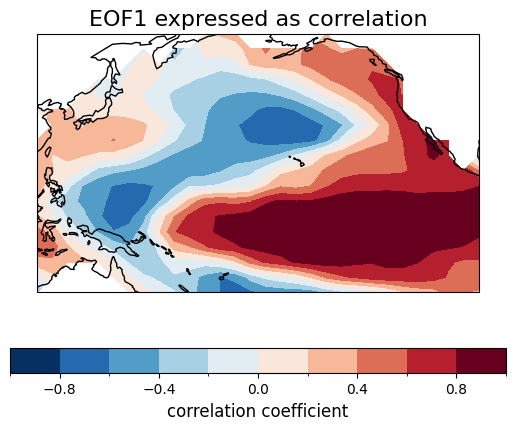

In [8]:
# Plot the leading EOF expressed as correlation in the Pacific domain.
clevs = np.linspace(-1, 1, 11)
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=190))
fill = eof1[0].plot.contourf(ax=ax, levels=clevs, cmap=plt.cm.RdBu_r,
                             add_colorbar=False, transform=ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE, color='k', edgecolor='k')
cb = plt.colorbar(fill, orientation='horizontal')
cb.set_label('correlation coefficient', fontsize=12)
ax.set_title('EOF1 expressed as correlation', fontsize=16)


How to interpret this plot: This is the pattern where if we took this map and multiplied by an the PC time series (positive or negative), it would explain the highest amount of variation in the spatial pattern across the time series. The units are the correlation coefficient (at each grid cell) based on the time series. For example, the deep red colors are areas where this particular EOF can explain more than 80% of the variability in SST over the time series. Whether or not this pattern is associated with positive SST anomalies or negative SST anomalies is dependent on the sign of the PC (if positive corr and PC is positive at that time, then the SST anom is positive; if positive corr and PC is negative at that time, then the SST anom is negative). Likewise, the blue colors (negative correlations) represent areas that correspond with the opposite sign of the PC (if PC is positive, SST is negative in those regions).

The size of the domain you select is also going to matter, because all the modes of variability within the domain will be picked up and the feature you're looking at may not be the feature represented by the EOF. In this domain, because the ENSO region has the highest SST variability of anywhere in the domain, the first EOF, which explains the most variability typically, is going to be most represented by the changes in the ENSO region, hence why we see the strongest correlations in that region. 

Text(0.5, 1.0, 'PC1 Time Series')

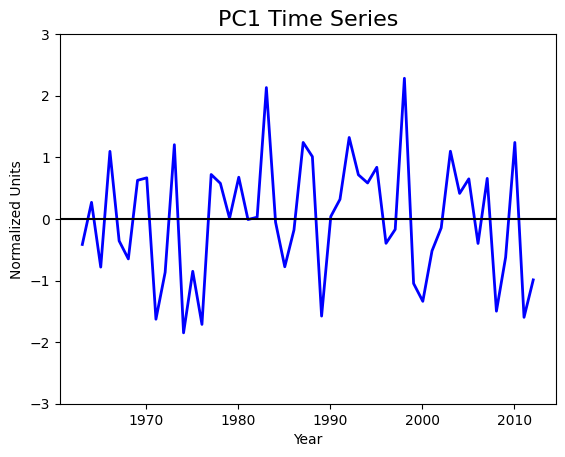

In [9]:
# Plot the leading PC time series.
plt.figure()
pc1[:, 0].plot(color='b', linewidth=2)
ax = plt.gca()
ax.axhline(0, color='k')
ax.set_ylim(-3, 3)
ax.set_xlabel('Year')
ax.set_ylabel('Normalized Units')
ax.set_title('PC1 Time Series', fontsize=16)


How to interpret this plot: If you were to take the values from the map we created earlier and multiplied those values with this time series, you would get the SST anomalies across the time series explained by this particular PC. The y-axis is the SST anomalies associated with this PC. For example, those spikes in the time series around 1983 and 1997 are El Nino events, and since those events are arbitrated by the ENSO region on the map which has the largest correlations, those spikes in this PC are largely explained by the postiive SST anomalies associated with those El Nino events. Likewise, the La Nina events (dips in the PC) are also largely associated with the positive correlations in the ENSO region.

Note that these are only associated with the first EOF and PC.

/global/homes/d/dbrooks/.conda/envs/myenv/lib/python3.11/site-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


Text(0.5, 1.0, 'EOF2 expressed as correlation')

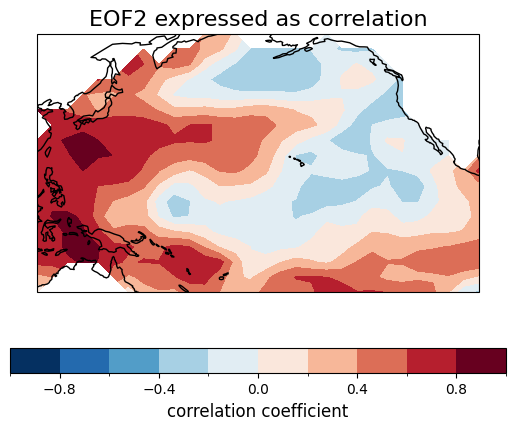

In [7]:
# Plot the leading EOF expressed as correlation in the Pacific domain.
clevs = np.linspace(-1, 1, 11)
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=190))
fill = eof1[1].plot.contourf(ax=ax, levels=clevs, cmap=plt.cm.RdBu_r,
                             add_colorbar=False, transform=ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE, color='k', edgecolor='k')
cb = plt.colorbar(fill, orientation='horizontal')
cb.set_label('correlation coefficient', fontsize=12)
ax.set_title('EOF2 expressed as correlation', fontsize=16)


Text(0.5, 1.0, 'PC2 Time Series')

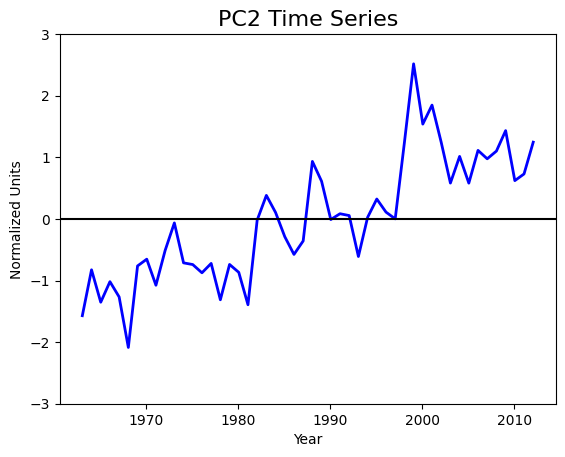

In [11]:
# Plot the second PC time series.
plt.figure()
pc1[:, 1].plot(color='b', linewidth=2)
ax = plt.gca()
ax.axhline(0, color='k')
ax.set_ylim(-3, 3)
ax.set_xlabel('Year')
ax.set_ylabel('Normalized Units')
ax.set_title('PC2 Time Series', fontsize=16)


Now this PC has an upward trend, which is not typically associated with climate oscialltions. One might infer that the SST anomalies in the regions with high correlation with EOF2 (in this case, it's the Western Pacific) have increased positively over the time series. This could be a signal of long term climate change. If interested in shorter term variability, you might want to de-trend the data

In [12]:
varfrac = solver.varianceFraction()

(9.660843058243892e-32, 0.49986294005974374)

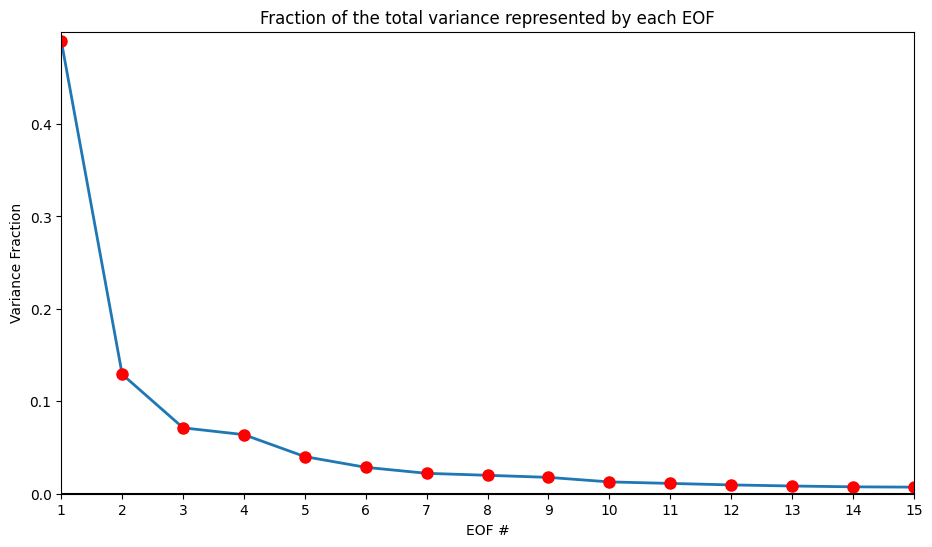

In [13]:
# Plot the fraction of variance explained by each EOF
plt.figure(figsize=(11,6))
eof_num = range(1, 16)
plt.plot(eof_num, varfrac[0:15], linewidth=2)
plt.plot(eof_num, varfrac[0:15], linestyle='None', marker="o", color='r', markersize=8)
plt.axhline(0, color='k')
plt.xticks(range(1, 16))
plt.title('Fraction of the total variance represented by each EOF')
plt.xlabel('EOF #')
plt.ylabel('Variance Fraction')
plt.xlim(1, 15)
plt.ylim(np.min(varfrac), np.max(varfrac)+0.01)

Each EOF explains a certain amount of the overall variability in the time series. In this case, the first EOF accounts for the most variation (almost 50%). In theory, you can derived as many EOFs as you want but only a certain number of them will be statistiically significant.

In [10]:
reconstruction = solver.reconstructedField(1)
reconstruction

<xarray.DataArray 'sst' (time: 50, latitude: 18, longitude: 30)> Size: 216kB
array([[[ 0.07167575,         nan,         nan, ..., -0.08494593,
         -0.09412086, -0.09067503],
        [ 0.0131141 , -0.02563504,         nan, ..., -0.11998695,
         -0.11802849, -0.10835343],
        [-0.04347773, -0.05731621, -0.07160009, ..., -0.12607059,
         -0.11035448, -0.10143509],
        ...,
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]],

       [[-0.04652146,         nan,         nan, ...,  0.05513452,
          0.06108956,  0.05885302],
        [-0.00851176,  0.01663854,         nan, ...,  0.07787805,
          0.07660691,  0.07032727],
        [ 0.02821941,  0.03720134,  0.04647235, ...,  0.08182666,
          0.07162606,  0.06583689],
...
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]],

       [[ 0.17108741,         nan,         nan, ..., -0.20276283,
         -0.22466306, -0.21643798],
        [ 0.03130287, -0.06118991,         nan, ..., -0.28640448,
         -0.2817297 , -0.2586357 ],
        [-0.10377976, -0.1368117 , -0.1709068 , ..., -0.30092589,
         -0.26341212, -0.24212186],
        ...,
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]]])
Coordinates:
  * time       (time) datetime64[ns] 400B 1963-01-15T12:00:00 ... 2012-01-16
  * latitude   (latitude) float32 72B -22.5 -17.5 -12.5 -7.5 ... 52.5 57.5 62.5
  * longitude  (longitude) float32 120B 117.5 122.5 127.5 ... 252.5 257.5 262.5
Attributes:
    long_name:  sst_reconstructed_with_1_EOFs

/global/homes/d/dbrooks/.conda/envs/myenv/lib/python3.11/site-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


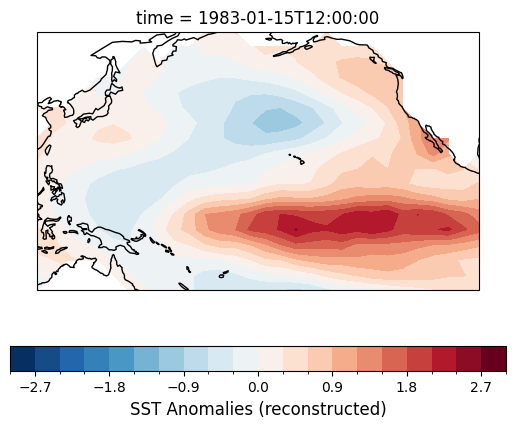

In [14]:
# Plot the reconstructed SSTs based on EOF1
clevs = np.linspace(-3, 3, 21)
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=190))
fill = reconstruction.sel(time='1983-01-15', method='nearest').plot.contourf(ax=ax, levels=clevs, cmap=plt.cm.RdBu_r,
                             add_colorbar=False, transform=ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE, color='k', edgecolor='k')
cb = plt.colorbar(fill, orientation='horizontal')
cb.set_label('SST Anomalies (reconstructed)', fontsize=12)


/global/homes/d/dbrooks/.conda/envs/myenv/lib/python3.11/site-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


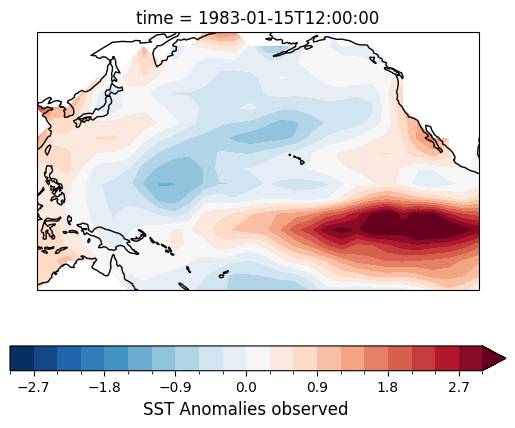

In [15]:
# Plot the observed SSTs
clevs = np.linspace(-3, 3, 21)
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=190))
fill = sst.sel(time='1983-01-15', method='nearest').plot.contourf(ax=ax, levels=clevs, cmap=plt.cm.RdBu_r,
                             add_colorbar=False, transform=ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE, color='k', edgecolor='k')
cb = plt.colorbar(fill, orientation='horizontal')
cb.set_label('SST Anomalies observed', fontsize=12)
